# Comparison of London and Barcelona pricing

In today's globalized world, people are increasingly mobile, moving from one city to another for work, study, or lifestyle. One important factor in deciding where to live is the cost of housing. In this report, we will compare the housing prices of two popular European cities - London and Barcelona. Specifically, we will analyze the average price per square meter of properties for rent in both cities, using two popular online real estate websites. By doing so, we hope to gain insight into the affordability of living in these cities and help readers make informed decisions when considering relocation.

We will do a comparison of Barcelona and London hosing prices. In particular we will compare the price per square meter in euros in both cities.

This one for London:

https://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=&sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare=

And this one for Barcelona:

https://www.habitaclia.com/alquiler-barcelona.htm?codzonas=203,204,205,201,202,206,308,304,306,305,303,302,301,307&coddists=200,300


We will average the m2/€ for some properties in both websites.

*Please note that the results presented here may be biased and not entirely accurate. The data shown represents a small and potentially biased sample, and therefore cannot be considered representative of the entire market or population. As such, any conclusions drawn from this data should be taken with caution and verified with additional sources.*


In [20]:
#import libraries

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from fake_useragent import UserAgent
import time
import pandas as pd
import numpy as np 
from currency_converter import CurrencyConverter
import matplotlib.pyplot as plt

## Setting Up a Web Driver for Chrome

When using Selenium to automate browser actions, we need to have a web driver installed for the specific browser you want to use. In this example, we'll be setting up a web driver for Chrome.

### Step 1: Download Chrome Driver
Let´s download the Chrome Driver executable file. You can download it from the Chrome Driver website.

### Step 2: Install Selenium
If you haven't already, install Selenium.

### Step 3: Set the Path to the Chrome Driver Executable
Before we can use the Chrome Driver with Selenium, we need to specify the path to the executable file. 

In [11]:
ser = Service("/chromedriver_win32") #This service package should be install

ua = UserAgent()
chrome_options = webdriver.ChromeOptions() #For chrome
chrome_options.add_argument("--incognito")
options = Options()
options.headless = True


C:\Users\akash\AppData\Local\Temp\ipykernel_33700\3257322049.py:7: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True


## Geting London Price

To get the average price of London, we will follow the next steps.

### Step 1: Get links
Let´s get the links of 10 differnt pages from the URL.

In [102]:
#Get Links Of London

def get_lnd_links():
    links = []
    driver = webdriver.Chrome(options=options, service=ser)
    url = "https://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=&sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare="
    driver.get(url)
    for i in range(10):
        apts_links = driver.find_elements(By.CLASS_NAME, "propertyCard-details")
        for a in apts_links:
            links.append(a.find_element(By.CLASS_NAME, "propertyCard-link").get_attribute('href'))
        nb = driver.find_element(By.XPATH, "//button[contains(@class, 'pagination-button pagination-direction pagination-direction--next')]")
        nb.click()
        time.sleep(2)
    df = pd.DataFrame(links)
    df = df.rename(columns={0: 'urls'})
    df.to_csv('london_links.csv', index=False)

    driver.quit()
    return 

get_lnd_links()

### Step 2: Get Prices and size
For each link, let`s get the prices and sizes of the listings.

In [13]:
#Get London Prices & Sizes

def get_lnd_prices():
    prop_dict_list = []
    
    df = pd.read_csv('london_links.csv')
    options = Options()
    options.headless = True
    options.add_argument("--window-size=1920,1200")
    driver = webdriver.Chrome('./chromedriver_mac64/chromedriver', options=options)


    for i in df['urls']:
        try: 
            prop_dict = {}
            page = driver.get(i)
            prop_dict['price_month'] = driver.find_element(By.XPATH,"// div[contains(@class,'_1gfnqJ3Vtd1z40MlC0MzXu')]/span").text
            prop_dict['sqm'] =  driver.find_element(By.CLASS_NAME,"_4hBezflLdgDMdFtURKTWh").find_element(By.CLASS_NAME,"_3vyydJK3KMwn7-s2BEXJAf").text
            prop_dict_list.append(prop_dict)
            time.sleep(1)
        except:
            continue
  
    df = pd.DataFrame(prop_dict_list)
    df.to_csv('london_prices.csv', index=False)
    driver.quit()
    return df

get_lnd_prices()


C:\Users\akash\AppData\Local\Temp\ipykernel_33700\1658195187.py:8: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True
C:\Users\akash\AppData\Local\Temp\ipykernel_33700\1658195187.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver_mac64/chromedriver', options=options)


,price_month,sqm
0,"£5,633 pcm",(122 sq. m.)
1,"£4,333 pcm",(68 sq. m.)
2,"£1,500 pcm",(63 sq. m.)
3,"£2,058 pcm",(37 sq. m.)
4,"£2,250 pcm",(70 sq. m.)
5,"£2,400 pcm",(76 sq. m.)
6,"£1,550 pcm",(55 sq. m.)
7,"£4,767 pcm",(95 sq. m.)
8,"£2,058 pcm",(37 sq. m.)
9,"£2,167 pcm",(49 sq. m.)


### Step 3: Convert to Euro

In [14]:
#Get Today´s exchange rate
c = CurrencyConverter()
c.convert(1, 'GBP', 'EUR')

1.1261261261261262

In [16]:
#Calculate London Prices in Euros per m2
london_prices = pd.read_csv("london_prices.csv")
london_prices

#Getting Price per square meter

price_per_square_meter_pounds = []

for i, j in london_prices.iterrows():
    price = float(london_prices["price_month"][i].replace(",","").replace("£", "").replace(" pcm", ""))
    size = float(london_prices["sqm"][i].replace("(","").replace(" sq. m.)", ""))
    price_per_square_meter_pounds.append(price / size)



#Convert currency
c = CurrencyConverter()
pound_price = c.convert(1, 'GBP', 'EUR')
price_per_square_meter_euros = np.array(price_per_square_meter_pounds) * pound_price



### Step 4: Calculate the AVG price per Square Meter.

In [18]:
#avg monthly price in euros
london_avg_mpnthly_price_in_euros = price_per_square_meter_euros.mean()
london_avg_mpnthly_price_in_euros

68.40316000719486

## Geting Barcelona Prices

To get the average price of Barcelona, we will follow the next steps.

### Step 1: Get links
Let´s get the links of 7 differnt pages from the URL.

In [41]:
#Get Links Of Barcelona

def get_bcn_links():
    links = []
    driver = webdriver.Chrome(options=options, service=ser)
    url = "https://www.habitaclia.com/alquiler-barcelona.htm?codzonas=203,204,205,201,202,206,308,304,306,305,303,302,301,307&coddists=200,300"
    driver.get(url)

    for i in range(7):
        apts_links = driver.find_elements(By.CLASS_NAME, "list-item-info")
        for a in apts_links:
            links.append(a.find_element(By.CLASS_NAME, "list-item-title").find_element(By.XPATH, "a").get_attribute('href'))
        next_page = driver.find_element(By.CLASS_NAME, "next").find_element(By.XPATH, "a").get_attribute('href')
        driver.get(next_page)
        time.sleep(2)
        
    df = pd.DataFrame(links)
    df = df.rename(columns={0: 'urls'})
    df.to_csv('barcelona_links.csv', index=False)

    driver.quit()
    return 


get_bcn_links()

### Step 2: Get Prices per square meter

For each link, let`s get the prices per square meter the listings.

In [42]:
#Get Barcelona Prices 

def get_bcn_prices():
    prop_dict_list = []
    
    df = pd.read_csv('barcelona_links.csv')
    options = Options()
    options.headless = True
    driver = webdriver.Chrome('./chromedriver_mac64/chromedriver', options=options)


    for i in df['urls']:
        try: 
            prop_dict = {}
            page = driver.get(i)
            prop_dict['m2/€'] = driver.find_element(By.XPATH,"//*[@id='js-feature-container']/ul/li[4]/strong").text
#            prop_dict['sqm'] =  driver.find_element(By.CLASS_NAME,"_4hBezflLdgDMdFtURKTWh").find_element(By.CLASS_NAME,"_3vyydJK3KMwn7-s2BEXJAf").text
            prop_dict_list.append(prop_dict)
            time.sleep(1)
        except:
            continue
  
    df = pd.DataFrame(prop_dict_list)
    df.to_csv('barcelona_prices.csv', index=False)
    driver.quit()
    return df

get_bcn_prices()

C:\Users\akash\AppData\Local\Temp\ipykernel_26040\385869702.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver_mac64/chromedriver', options=options)


,m2/€
0,"44,83"
1,"16,56"
2,"22,31"
3,"37,25"
4,"19,55"
...,...
98,"81,25"
99,"16,70"
100,"36,36"
101,"12,12"


### Step 4: Calculate the AVG price per Square Meter.

In [19]:
#Calculate Barcelona AVG Price 
barcelona_prices = pd.read_csv("barcelona_prices.csv")
barcelona_prices

#Formating values
prices = []
for i, j in barcelona_prices.iterrows():
    price = float(barcelona_prices["m2/€"][i][:2].replace(",","")) + (int(barcelona_prices["m2/€"][i][2:].replace(",",""))/100)
    prices.append(price)


#Barcelona avg monthly price in euros
barcelona_avg_mpnthly_price_in_euros = round(np.mean(prices),2)
barcelona_avg_mpnthly_price_in_euros

21.9

# Ploting Results 

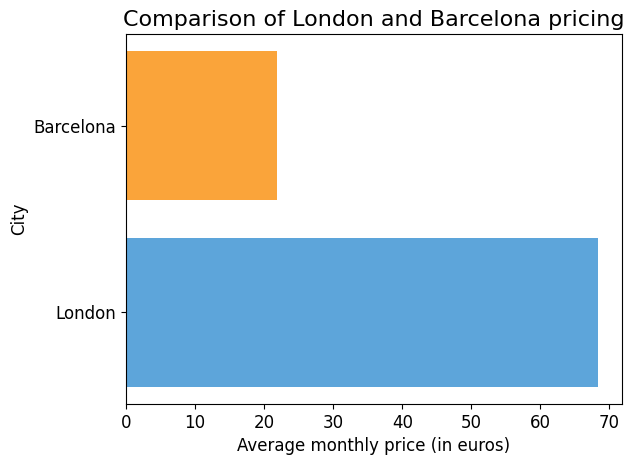

In [32]:
# Data
cities = ["London", "Barcelona"]
avg_prices = [london_avg_mpnthly_price_in_euros, barcelona_avg_mpnthly_price_in_euros]
colors = ['#5DA5DA', '#FAA43A']

# Create plot
fig, ax = plt.subplots()

# Set plot title and axis labels
ax.set_title("Comparison of London and Barcelona pricing", fontsize=16)
ax.set_xlabel('Average monthly price (in euros)', fontsize=12)
ax.set_ylabel('City', fontsize=12)

# Set tick font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Create horizontal bar plot
ax.barh(cities, avg_prices, color=colors)

# Display plot
plt.show()


# Conclusion

This exercise highlights the usefulness of web scraping in collecting and comparing data from different sources. Web scraping allows us to quickly and efficiently collect large amounts of data, which can be useful in making informed decisions. However, it's important to note that the data obtained through web scraping may be incomplete or biased, and thus requires careful analysis and validation before any conclusions can be drawn.

When comparing data obtained through web scraping, it's important to consider the source and the methodology used in collecting the data. In this exercise, we compared the average price per square meter of rental properties in London and Barcelona, using two popular online real estate websites. By doing so, we were able to gain insight into the affordability of living in these cities. However, we also acknowledged the limitations of our data, such as potential biases and inaccuracies.

Overall, this exercise demonstrates the potential benefits of web scraping in comparing data from different sources, but also highlights the importance of being aware of the limitations and potential biases in the data obtained.

### Next Steps

To continue building on the insights gained from this exercise, here are some next steps we could follow:

Further validate the data: In order to ensure the accuracy and completeness of the data obtained through web scraping, it's important to validate it using other sources. This can involve cross-checking the data against official statistics or other credible sources, or conducting surveys or interviews to verify the information.

Expand the data sources: Using only two online real estate websites may limit the scope and accuracy of the data obtained. To get a more comprehensive picture, it may be beneficial to include additional websites or sources of data.

Analyze the data: Once you have collected and validated the data, it's important to analyze it in order to draw meaningful insights. This can involve using statistical tools to identify trends or patterns, or visualizing the data to make it easier to understand.